<a href="https://colab.research.google.com/github/hogyunkim/pocket/blob/main/6_LightGBM%EC%9C%BC%EB%A1%9C_%EC%82%AC%EA%B8%B0%EA%B1%B0%EB%9E%98_%ED%83%90%EC%A7%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://media.githubusercontent.com/media/DSNote/taling_data/main/fraud.csv')

In [3]:
# 테이블 뷰 설정
pd.set_option('display.max_columns', 30)

In [4]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [6]:
round(data.describe(), 2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


데이터 클리닝

In [7]:
data.drop(['merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'trans_num', 'unix_time'], axis = 1, inplace = True)

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


피처 엔지니어링 

In [10]:
# 기존 변수들을 활용해서 예측에 활용될 새로운 변수 생성하는 과정
# 변수와 도메인에 대한 아이디어 중요

In [11]:
temp = pd.DataFrame({'a': [20, 30, 40, 20, 15, 30, 60, 80, 90, 500], 'b': [300, 500, 700, 600, 200, 600, 100, 700, 300, 500], 'c': [20, 300, 30, 400, 15, 800, 40, 600, 45, 500]})

In [12]:
temp.mean()

a     88.5
b    450.0
c    275.0
dtype: float64

In [13]:
temp.std()

a    146.894709
b    212.132034
c    288.463362
dtype: float64

In [14]:
(temp['a']- 88.5) / 146.894709

0   -0.466320
1   -0.398244
2   -0.330168
3   -0.466320
4   -0.500358
5   -0.398244
6   -0.194017
7   -0.057865
8    0.010211
9    2.801326
Name: a, dtype: float64

In [15]:
(temp['b'] - 450) / 212.132034

0   -0.707107
1    0.235702
2    1.178511
3    0.707107
4   -1.178511
5    0.707107
6   -1.649916
7    1.178511
8   -0.707107
9    0.235702
Name: b, dtype: float64

In [16]:
(temp['c'] - 270) / 288.463362


0   -0.866661
1    0.103999
2   -0.831995
3    0.450664
4   -0.883994
5    1.837322
6   -0.797328
7    1.143993
8   -0.779995
9    0.797328
Name: c, dtype: float64

In [17]:
data['cc_num'].value_counts()

6538441737335434       4392
30270432095985         4392
6538891242532018       4386
4364010865167176       4386
4642255475285942       4386
                       ... 
4714017207228610634       7
4352307151555405069       7
180097223252063           7
6011732631674654          7
4295296907373             6
Name: cc_num, Length: 999, dtype: int64

In [18]:
amt_info = data.groupby('cc_num').agg(['mean', 'std'])['amt'] #agg = 여러 함수 동시에 사용

In [19]:
amt_info

,mean,std
cc_num,,
60416207185,59.257796,142.869746
60422928733,65.483159,92.042844
60423098130,96.376084,1000.693872
60427851591,107.487550,131.014534
60487002085,64.096925,153.207660
...,...,...
4958589671582726883,67.205600,137.504101
4973530368125489546,75.789148,258.847061
4980323467523543940,70.709484,119.903167


In [20]:
amt_info.reset_index(inplace = True)

In [21]:
data = data.merge(amt_info, on = 'cc_num', how = 'left') #merge = 조인 함수, on = 조인할 기준변수, how = 방법

In [22]:
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std']

In [23]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101,-0.662108
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852,0.321302
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602,1.287064
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880,-0.125287
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842,-0.565941


In [24]:
data.drop(['mean', 'std'], axis = 1, inplace = True)

In [25]:
category_info = data.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index()

In [26]:
data = data.merge(category_info, on = ['cc_num', 'category'], how = 'left')

In [27]:
data['cat_z_score'] = (data['amt'] - data['mean']) / data['std']

In [28]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean,std,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,46.653103,60.385161,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,61.537283,15.746841,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,35.481357,4.934731,1.312866


In [29]:
import geopy.distance #좌표간의 거리 계산

In [30]:
geopy.distance.distance((38.674999,	-78.632459), (47.034331, -112.561071)).km

2897.9428093393685

In [31]:
def plus_ten(x):
  return x + 10

In [32]:
data['distance'] = data.apply(lambda x: geopy.distance.distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis  =1)

In [33]:
distance_info = data.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index()

In [34]:
data = data.merge(distance_info, on = 'cc_num', how = 'left')

In [35]:
data.head(3)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean_x,std_x,cat_z_score,distance,mean_y,std_y
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300,-0.688297,78.773821,77.842362,30.072493
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424,0.317631,30.216618,71.656621,28.090646
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,46.653103,60.385161,2.872509,108.102912,74.581011,28.883956


In [36]:
data.drop(['mean_x', 'std_x'], axis = 1 , inplace = True)

In [37]:
data['dist_z_score'] = (data['distance'] - data['mean_y']) / data['std_y']

In [38]:
data.drop(['mean_y', 'std_y'], axis = 1, inplace = True)

In [39]:
data['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [40]:
data['dob'] = pd.to_datetime(data['dob'])

In [41]:
data['dob'].dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [42]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,distance,dist_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,77.702395,0.064037


In [43]:
data.drop(['cc_num', 'lat', 'long', 'merch_lat', 'merch_long', 'dob'], axis = 1, inplace = True)

In [44]:
data = pd.get_dummies(data, columns = ['category', 'gender'], drop_first = True)

In [45]:
data

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,dist_z_score,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.167639,-0.047862,77.032467,0.052081,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.364619,1.163822,100.023736,0.693848,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.015209,0.440137,80.887812,0.288293,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.592099,-0.007423,53.060882,-0.730061,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [46]:
data.set_index('trans_date_trans_time', inplace = True)

모델링

In [47]:
train = data[data.index < '2020-07-01']
test = data[data.index >= '2020-07-01']

In [48]:
len(test) / len(data)

0.2837738623640543

In [49]:
X_train = train.drop('is_fraud', axis =1)
X_test = test.drop('is_fraud', axis =1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [50]:
import lightgbm as lgb

In [51]:
lgbm = lgb.LGBMClassifier(random_state = 100)

In [52]:
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=100)

In [53]:
train_pred = lgbm.predict(X_train)
test_pred = lgbm.predict(X_test)

In [54]:
# ROC curve, AUC 는 쓰레쉬홀드의 영향을 받지 않고 모델의 성능을 평가하는 지표

모델 예측 결과 평가

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [56]:
accuracy_score(y_test, test_pred)

0.9968610948881503

In [57]:
confusion_matrix(y_test, test_pred)

array([[522792,    857],
       [   793,   1219]])

In [58]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.59      0.61      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.79      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [59]:
train_pred_proba = lgbm.predict_proba(X_train)
test_pred_proba = lgbm.predict_proba(X_test)

In [60]:
test_pred_proba = test_pred_proba[:, 1]

In [61]:
roc_auc_score(y_test, test_pred_proba)

0.9247321684911282

Grid search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {
    'n_estimotors': [100, 200],
    'learning_rate' : [0.01, 0.1],
    'max_depth' : [5, 10]
}

In [64]:
lgbm_grid = lgb.LGBMClassifier(random_state = 100)

In [65]:
gs_model = GridSearchCV(lgbm_grid, params, n_jobs = -1, scoring = 'f1', cv = None)

In [66]:
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimotors': [100, 200]},
             scoring='f1')

In [67]:
gs_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimotors': 100}

In [68]:
test_pred = gs_model.predict_proba(X_test)

In [69]:
test_pred = test_pred[:, 1]

In [70]:
roc_auc_score(y_test, test_pred)

0.976145626959148

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params = {
    'n_estimotors': [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.05],
    'max_depth' : [5, 10, 20],
    'lambda_l1': [0, 10, 20],
    'lambda_l2': [0, 10, 20] 
}

In [73]:
lgbm_r_grid = lgb.LGBMClassifier(random_state = 100)

In [74]:
r_grid_model = RandomizedSearchCV(lgbm_r_grid, params, n_jobs = -1, scoring = 'f1', n_iter = 10)

In [75]:
r_grid_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMClassifier(random_state=100), n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'max_depth': [5, 10, 20],
                                        'n_estimotors': [100, 200, 300]},
                   scoring='f1')

In [76]:
r_grid_model.best_params_

{'n_estimotors': 100,
 'max_depth': 10,
 'learning_rate': 0.1,
 'lambda_l2': 10,
 'lambda_l1': 10}

In [77]:
r_grid_pred = r_grid_model.predict_proba(X_test)

In [78]:
r_grid_pred = r_grid_pred[:, 1]

In [79]:
roc_auc_score(y_test, r_grid_pred)

0.9940697090903018

feature importance

In [80]:
final_model = lgb.LGBMClassifier(**r_grid_model.best_params_)

In [81]:
final_model.fit(X_train, y_train)

LGBMClassifier(lambda_l1=10, lambda_l2=10, max_depth=10, n_estimotors=100)

In [82]:
final_pred = final_model.predict_proba(X_test)

In [83]:
final_pred = final_pred[:, 1]

In [84]:
roc_auc_score(y_test, final_pred)

0.9941073782114389

In [85]:
final_model.feature_importances_

array([887, 399, 359, 575,  86,  98,  29,  53,   5,  46,  31,  25,  57,
        24,  92,  48,  41,  59,  34,  52])

In [86]:
f_imp = pd.DataFrame({'feature_names': X_train.columns, 'importances': final_model.feature_importances_}).sort_values('importances', ascending = False)

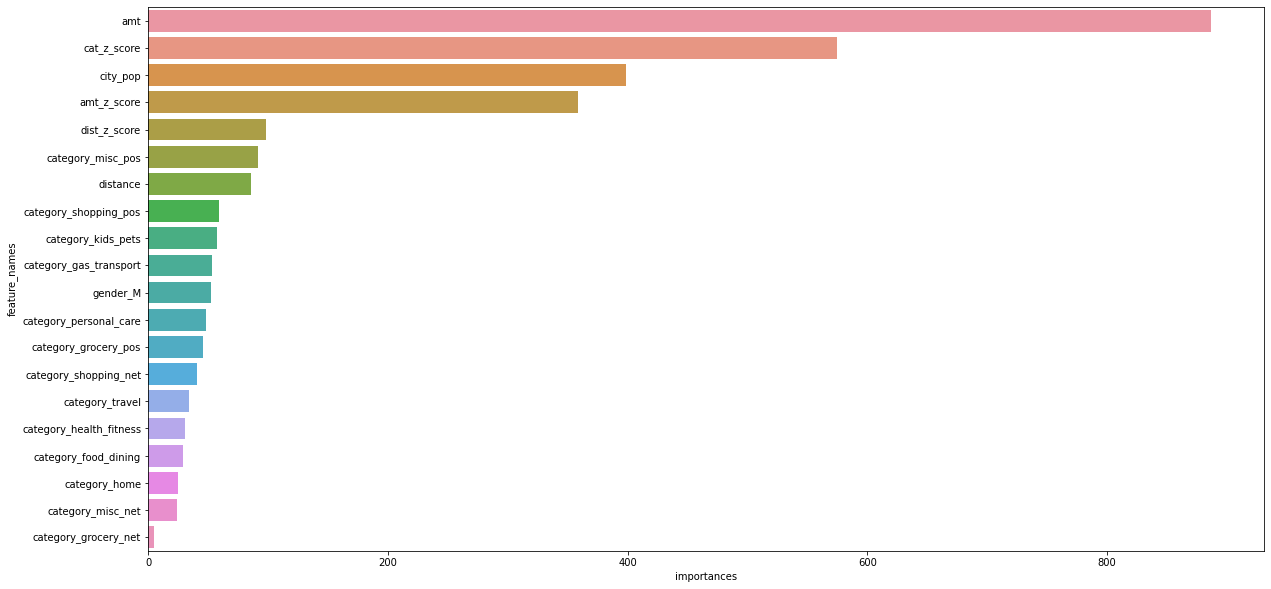

In [87]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'importances', y = 'feature_names', data = f_imp)
plt.show()

최적의 결과 만들기

In [88]:
pred_5 = (final_pred > 0.5).astype('int')
pred_3 = (final_pred > 0.3).astype('int')
pred_7 = (final_pred > 0.7).astype('int')

In [89]:
print(classification_report(y_test, pred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.76      0.58      0.66      2012

    accuracy                           1.00    525661
   macro avg       0.88      0.79      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [90]:
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.71      0.66      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.85      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [91]:
print(classification_report(y_test, pred_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.90      0.42      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.95      0.71      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [92]:
#recall score와 f1-score 값이 적절한 결과 선택(pred_3)

In [93]:
# 스스로 학습 리소스
# 질의응답사이트 - stackoverflow
# kaggle 
# Medium(입문자), Toward Data Science
# geeksforgeeks(예제 코드)
# youtube - 3 brown 1 blue
# statsquest
# 